## Problem Statement : Use linear regression to predict housing prices using sklearn library

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

### Importing Dataset

In [2]:
df = pd.read_csv('dataset/USA_Housing.csv')
df.head()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09     23086.800503  1.059034e+06   
1                          3.09     40173.072174  1.505891e+06   
2                          5.13     36882.159400  1.058988e+06   
3                          3.26     34310.242831  1.260617e+06   
4                          4.23     26354.109472  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, CA...  
2  9127 Elizabeth Stravenue\nDanieltown, WI 06482...  
3                          USS Barnett\nFPO AP 44820  
4                         USNS Raymond\nFPO AE 09386

In [3]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [5]:
df.describe()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
count       5000.000000          5000.000000                5000.000000   
mean       68583.108984             5.977222                   6.987792   
std        10657.991214             0.991456                   1.005833   
min        17796.631190             2.644304                   3.236194   
25%        61480.562388             5.322283                   6.299250   
50%        68804.286404             5.970429                   7.002902   
75%        75783.338666             6.650808                   7.665871   
max       107701.748378             9.519088                  10.759588   

       Avg. Area Number of Bedrooms  Area Population         Price  
count                   5000.000000      5000.000000  5.000000e+03  
mean                       3.981330     36163.516039  1.232073e+06  
std                        1.234137      9925.650114  3.531176e+05  
min                        2.000000       172.610686  1.593866e+04  
25%                        3.140000     29403.928702  9.975771e+05  
50%                        4.050000     36199.406689  1.232669e+06  
75%                        4.490000     42861.290769  1.471210e+06  
max                        6.500000     69621.713378  2.469066e+06

### Exploratory Data Analysis

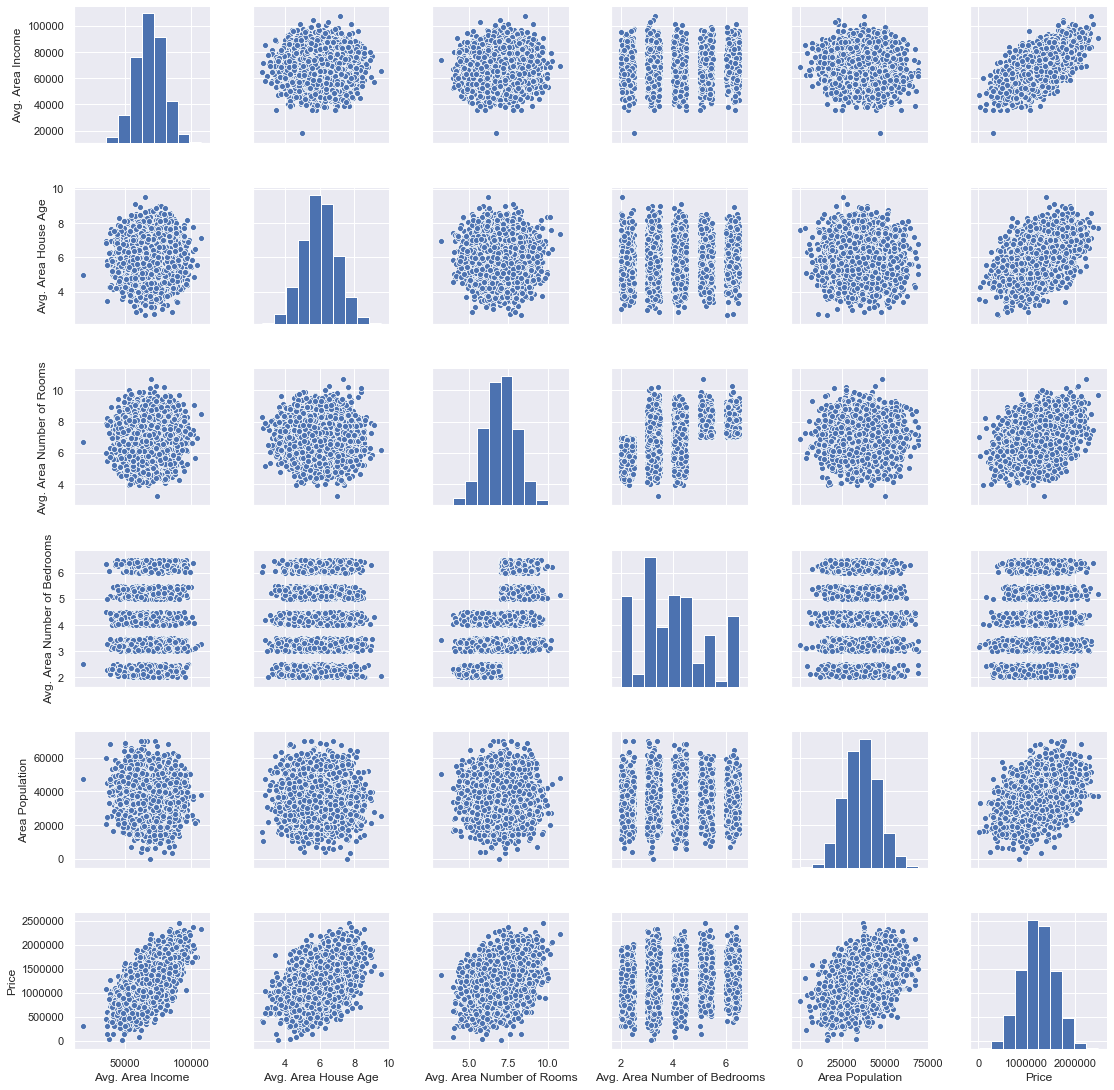

In [6]:
sns.pairplot(df)

In [7]:
sns.distplot(df['Price'])

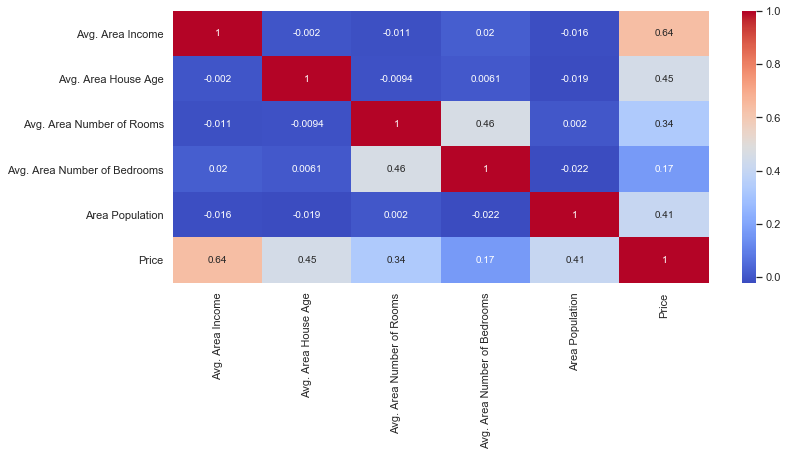

In [41]:
plt.figure(figsize=(12,5))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

## Training linear regression model

In [10]:
df.columns.values

array(['Avg. Area Income', 'Avg. Area House Age',
       'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms',
       'Area Population', 'Price', 'Address'], dtype=object)

In [28]:
## Separating out the target and feature columns

#### In statsmodels we were creating formula like : housing_price_index ~ total_unemployed

X = df[['Avg. Area Income', 'Avg. Area House Age',
       'Avg. Area Number of Rooms',
       'Area Population']] #, 'Avg. Area Number of Bedrooms'

y = df['Price']

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
X.shape

(5000, 4)

In [32]:
print(X_train.shape)
print(y_train.shape)

(4000, 4)
(4000,)


In [33]:
X_test.shape

(1000, 4)

## Creating and Training the model

In [34]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Evaluation

In [35]:
print(lm.intercept_)

-2635543.373594085


In [36]:
print(lm.coef_)

coeff_df = pd.DataFrame(lm.coef_,index=X.columns,columns=['coefficients'])

coeff_df

[2.16597504e+01 1.64702184e+05 1.21003907e+05 1.52655056e+01]


coefficients
Avg. Area Income               21.659750
Avg. Area House Age        164702.184429
Avg. Area Number of Rooms  121003.907115
Area Population                15.265506

###### Interpretation : 

* Holding all the other features fixed, a unit increase in Avg. Area Income will lead to increase in house price by USD 21.65


* Holding all the other features fixed, a unit increase in Avg. Area number of rooms will lead to increase in house price by USD 121003.90.

### Predictions

In [37]:
y_pred = lm.predict(X_test)

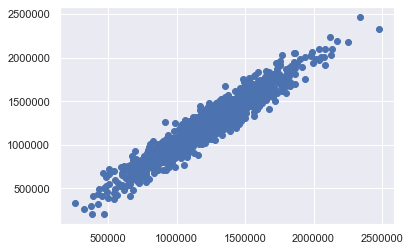

In [38]:
plt.scatter(y_pred,y_test)

#### Regression Evaluation Metrics

#### 3 main evaluation metrics:

* **Mean Absolute Error** : 

$$\frac ln\sum_{i=1}^n|y_\hat-{y}_i|$$


* **Mean Squared Error**

$$\frac ln\sum_{i=1}^n(y_\hat-{y}_i)^2$$



* **Root Mean Squared Error**

sqrt($$\frac ln\sum_{i=1}^n(y_\hat-{y}_i)^2$$)


All these are loss functions and we need to minimize them

In [39]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [40]:
print('Mean Absolute Error: ',mean_absolute_error(y_pred,y_test))
print('Mean Squared Error: ',mean_squared_error(y_pred,y_test))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_pred,y_test)))

Mean Absolute Error:  80857.78944046368
Mean Squared Error:  10073721633.872656
Root Mean Squared Error:  100367.93130214777


### Homework : Try this on the statsmodels notebook dataset

## Great Job !!